In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para gráficos
plt.style.use('ggplot')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Cargar los datos
df = pd.read_csv('training_log.csv')

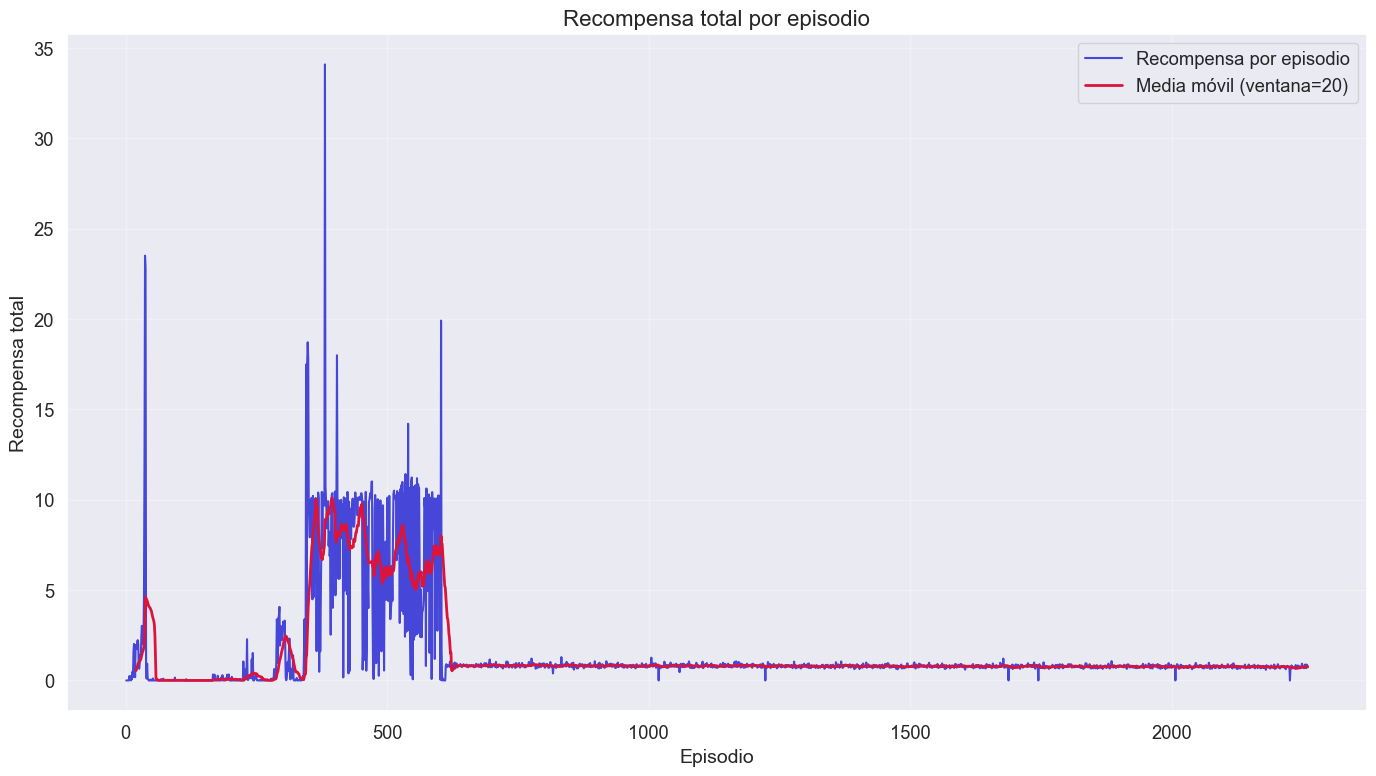

In [2]:
# 1. Recompensas por episodios

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['episode'], df['total_reward'], label='Recompensa por episodio', color='mediumblue', alpha=0.7)

# Añadir media móvil para mejor visualización (ventana de 20 episodios)
window_size = 20
df['moving_avg_reward'] = df['total_reward'].rolling(window=window_size).mean()
ax.plot(df['episode'], df['moving_avg_reward'], 
        label=f'Media móvil (ventana={window_size})', 
        color='crimson', 
        linewidth=2)

ax.set_title('Recompensa total por episodio')
ax.set_xlabel('Episodio')
ax.set_ylabel('Recompensa total')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reward_per_episode.png', dpi=300)
plt.show()

C:\Users\cexpo\AppData\Local\Temp\ipykernel_116880\2108613380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reward_by_timestep = df.groupby('timestep_bin')['total_reward'].agg(['mean', 'std', 'count']).reset_index()


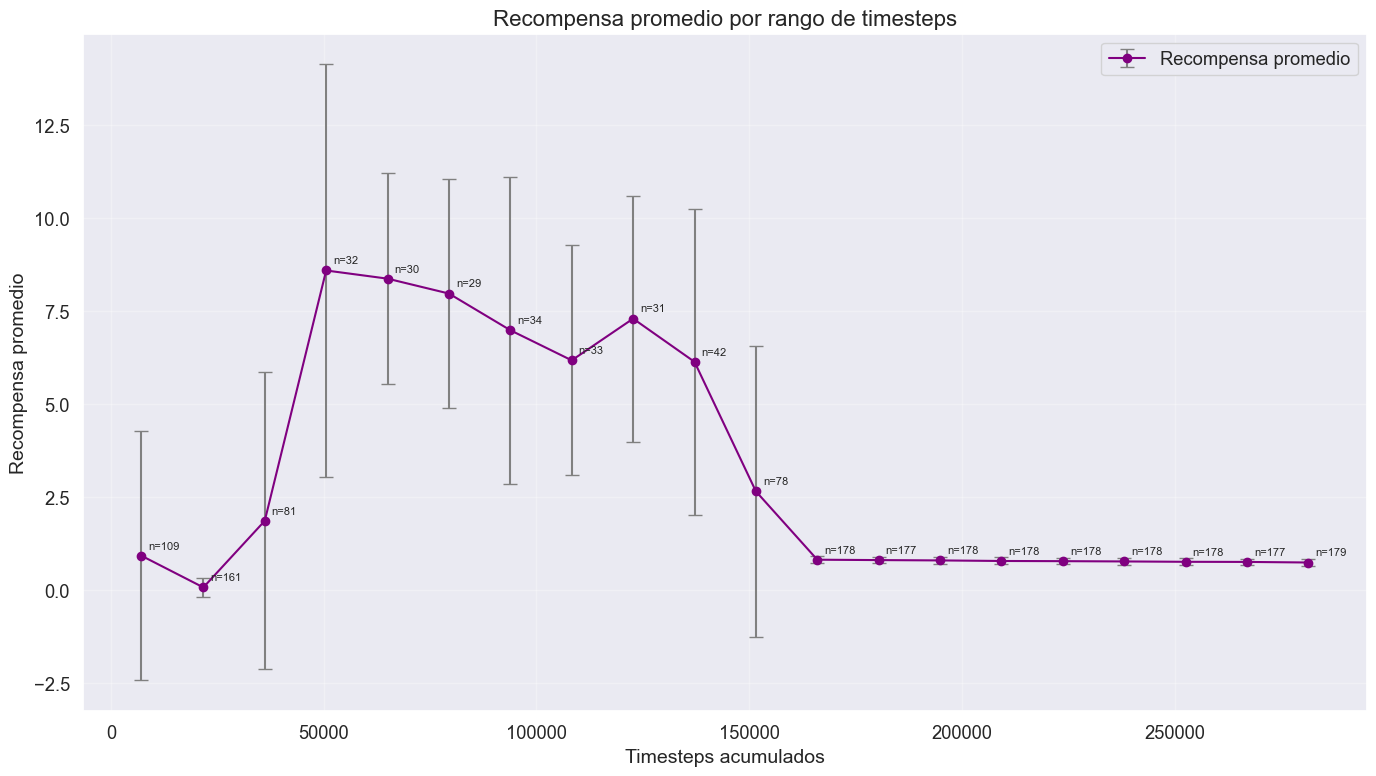

In [7]:
# 2. Análisis de recompensas según timesteps (promedio)
df['cumulative_timesteps'] = df['episode_length'].cumsum()
# Crear bins de timesteps para agrupar
num_bins = 20
df['timestep_bin'] = pd.cut(df['cumulative_timesteps'], bins=num_bins)
# Calcular la recompensa promedio por bin
reward_by_timestep = df.groupby('timestep_bin')['total_reward'].agg(['mean', 'std', 'count']).reset_index()
reward_by_timestep['bin_center'] = reward_by_timestep['timestep_bin'].apply(lambda x: x.mid)

# Gráfico de recompensas promedio por timestep con barras de error
fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(reward_by_timestep['bin_center'], 
            reward_by_timestep['mean'], 
            yerr=reward_by_timestep['std'],
            fmt='o-', 
            ecolor='gray', 
            capsize=5, 
            color='purple', 
            label='Recompensa promedio')

ax.set_title('Recompensa promedio por rango de timesteps')
ax.set_xlabel('Timesteps acumulados')
ax.set_ylabel('Recompensa promedio')
ax.legend()
ax.grid(True, alpha=0.3)

# Anotar tamaño de muestra en cada punto
for i, row in reward_by_timestep.iterrows():
    ax.annotate(f'n={int(row["count"])}', 
                xy=(row['bin_center'], row['mean']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.savefig('avg_reward_by_timestep.png', dpi=300)
plt.show()




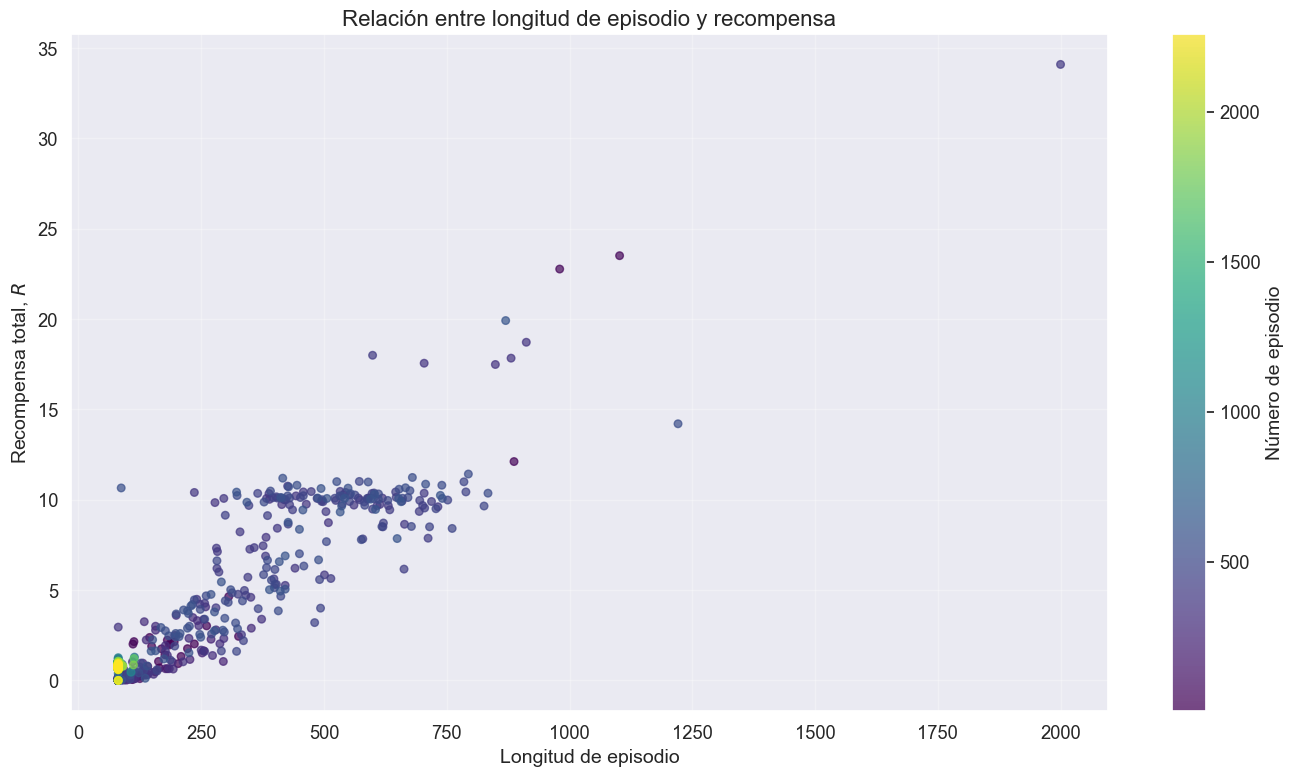

In [4]:
# 3. Longitud de episodio vs. recompensa

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['episode_length'], 
                    df['total_reward'], 
                    c=df['episode'], 
                    cmap='viridis', 
                    alpha=0.7,
                    s=30)

plt.colorbar(scatter, label='Número de episodio')
plt.title('Relación entre longitud de episodio y recompensa')
plt.xlabel('Longitud de episodio')
plt.ylabel('Recompensa total, $R$')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('episode_length_vs_reward.png', dpi=300)
plt.show()


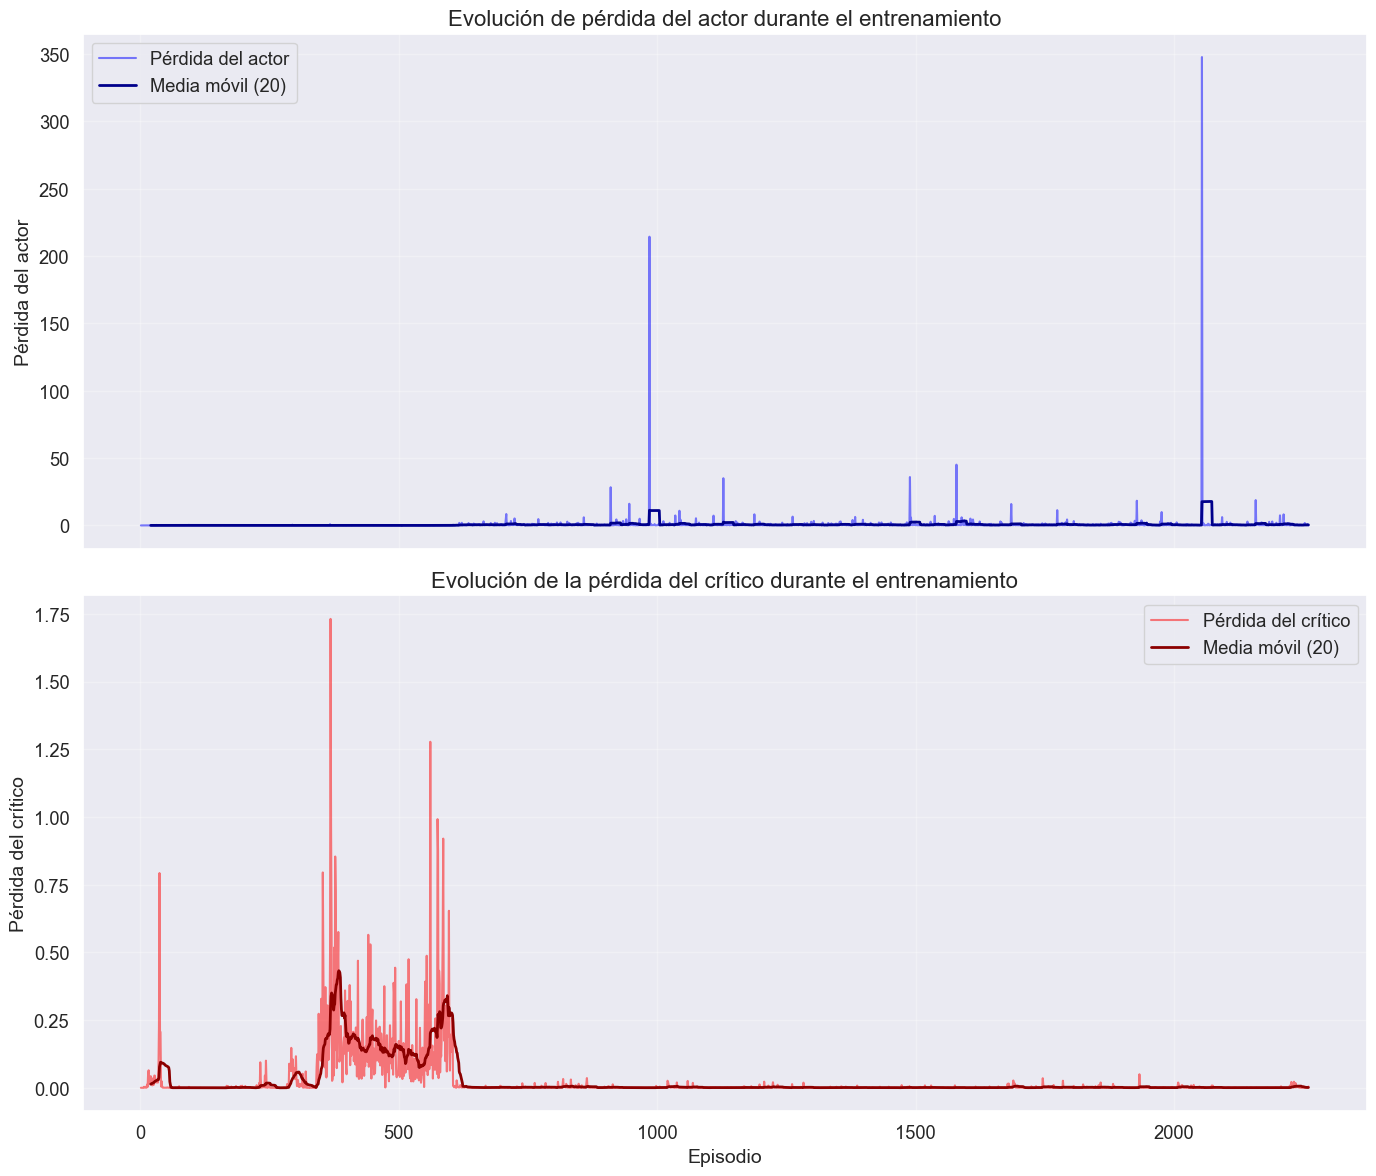

In [5]:
# 6. Evolución de pérdidas (actor y critic)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Actor loss
ax1.plot(df['episode'], df['actor_loss'], color='blue', alpha=0.5, label='Pérdida del actor')
ax1.plot(df['episode'], df['actor_loss'].rolling(window=20).mean(), 
         color='darkblue', linewidth=2, label='Media móvil (20)')
ax1.set_title('Evolución de pérdida del actor durante el entrenamiento')
ax1.set_ylabel('Pérdida del actor')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Critic loss
ax2.plot(df['episode'], df['critic_loss'], color='red', alpha=0.5, label='Pérdida del crítico')
ax2.plot(df['episode'], df['critic_loss'].rolling(window=20).mean(), 
         color='darkred', linewidth=2, label='Media móvil (20)')
ax2.set_title('Evolución de la pérdida del crítico durante el entrenamiento')
ax2.set_xlabel('Episodio')
ax2.set_ylabel('Pérdida del crítico')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('loss_evolution.png', dpi=300)
plt.show()

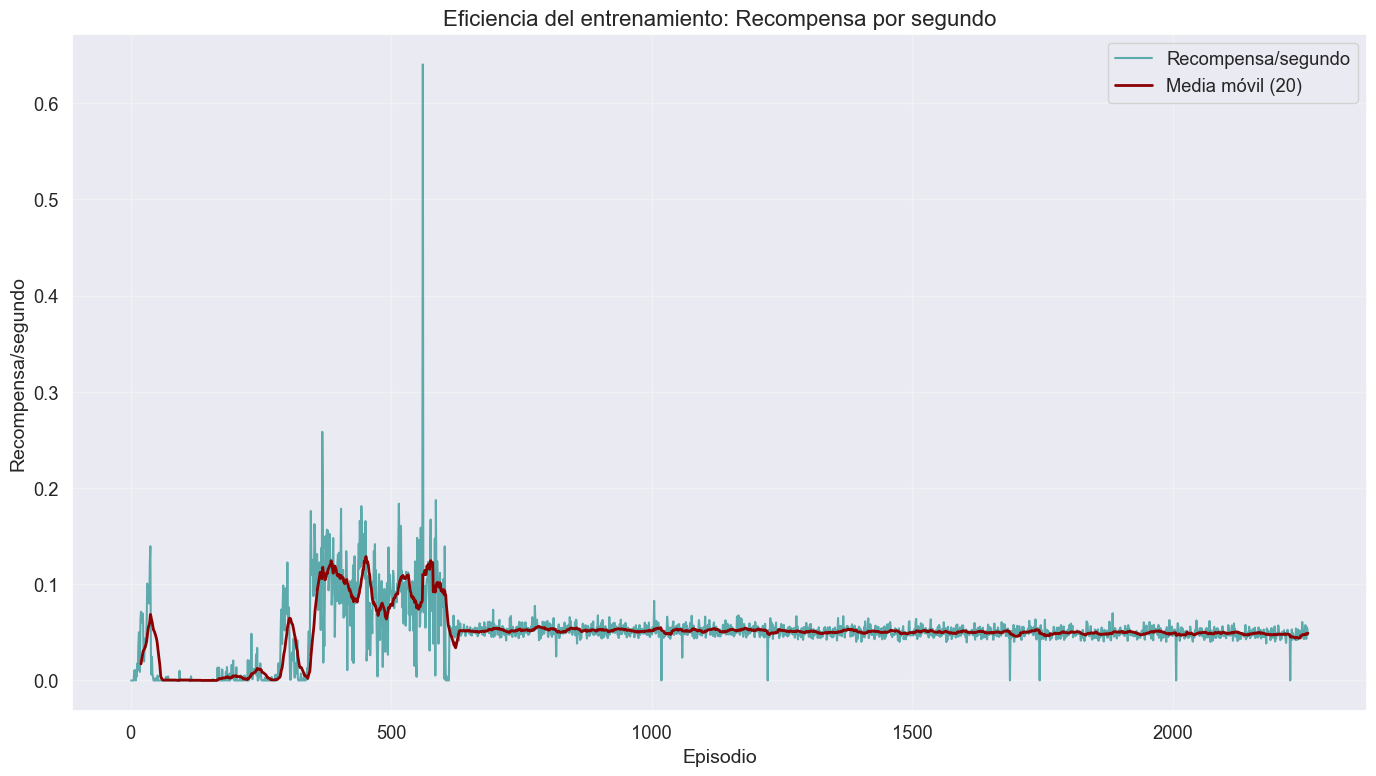

In [6]:
# 7. Análisis de eficiencia: Recompensa vs. Tiempo

# Calcular la recompensa por segundo de tiempo de entrenamiento
df['reward_per_second'] = df['total_reward'] / df['time_taken']

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['episode'], df['reward_per_second'], label='Recompensa/segundo', color='teal', alpha=0.6)
ax.plot(df['episode'], df['reward_per_second'].rolling(window=20).mean(), 
        label='Media móvil (20)', color='darkred', linewidth=2)

ax.set_title('Eficiencia del entrenamiento: Recompensa por segundo')
ax.set_xlabel('Episodio')
ax.set_ylabel('Recompensa/segundo')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('reward_efficiency.png', dpi=300)
plt.show()
